# MOwNiT 
## Laboratorium 8 - Algebra liniowa
### Autor: Jacek Nitychoruk

## Zadanie 1

In [145]:
using Statistics, LinearAlgebra, CSV, DataFrames, Polynomials,Images, TestImages, Printf

In [146]:
x = rand(1000)
A = rand(1000, 1000)
b = A*x
x

1000-element Array{Float64,1}:
 0.7282643487827705 
 0.4119348494363466 
 0.15370949731818406
 0.2070033908860578 
 0.6268479799405451 
 0.3398494866502588 
 0.280135539268912  
 0.02535809035958847
 0.21008386766647957
 0.02423099065821188
 0.13566239773282396
 0.8901420957062487 
 0.8126999329480689 
 ⋮                  
 0.87242258785364   
 0.10522847209709485
 0.45499353632176787
 0.860562566816816  
 0.747118588407464  
 0.2970400682614762 
 0.7584102467261198 
 0.5025502265905619 
 0.8298435489879685 
 0.7492039621140718 
 0.1911558358148644 
 0.896785063159335  

In [158]:
x1 = []
x2 = []
x3 = []

iter=50

function invA()
    global x1 = inv(A)*b
end

function slash()
    global x2 = A\b
end

function factorizeA()
    global x3 = factorize(A)\b
end

time1 = zeros(iter)
time2 = zeros(iter)
time3 = zeros(iter)
for i = -5:iter
    if i > 0
        time1[i] = @elapsed invA()
    end
end
for i = -5:iter
    if i > 0
        time2[i] = @elapsed slash()
    end
end
for i = -5:iter
    if i > 0
        time3[i] = @elapsed factorizeA()
    end
end
println("Porównanie czasów (s)")
println("inv(A)*b:\t", mean(time1))
println("A\\b:\t\t", mean(time2))
println("factorize(A)\\b:\t", mean(time3))

Porównanie czasów (s)
inv(A)*b:	0.06262307014
A\b:		0.026430216
factorize(A)\b:	0.03055640202


In [148]:
diff_1 = x - x1
diff_2 = x - x2
diff_3 = x - x3
println("Porównanie dokładności:")
println("inv(A)*b:\t", sqrt(dot(diff_1, diff_1)))
println("A\\b:\t\t", sqrt(dot(diff_2, diff_2)))
println("factorize(A)\\b:\t", sqrt(dot(diff_3, diff_3)))

Porównanie dokładności:
inv(A)*b:	1.4514854464950542e-10
A\b:		6.6703853436621534e-12
factorize(A)\b:	6.6703853436621534e-12


## Zadanie 2

In [149]:
raw_data=DataFrame()
raw_data=CSV.read("results.csv", delim=",")
raw_data

100×4 DataFrame
│ Row │ size  │ iteration │ time_vector │ time_matrix │
│     │ Int64 │ Int64     │ Float64     │ Float64     │
├─────┼───────┼───────────┼─────────────┼─────────────┤
│ 1   │ 500   │ 1         │ 1.2e-6      │ 0.000760799 │
│ 2   │ 500   │ 2         │ 1.7e-6      │ 0.0007767   │
│ 3   │ 500   │ 3         │ 1.1e-6      │ 0.001112    │
│ 4   │ 500   │ 4         │ 1.7e-6      │ 0.0018831   │
│ 5   │ 500   │ 5         │ 1.6e-6      │ 0.0017157   │
│ 6   │ 500   │ 6         │ 1.5e-6      │ 0.0016582   │
│ 7   │ 500   │ 7         │ 1.1e-6      │ 0.0684774   │
│ 8   │ 500   │ 8         │ 1.8e-6      │ 0.0010937   │
│ 9   │ 500   │ 9         │ 1.2e-6      │ 0.0010211   │
│ 10  │ 500   │ 10        │ 1.3e-6      │ 0.0007976   │
⋮
│ 90  │ 4500  │ 10        │ 7.099e-6    │ 0.240246    │
│ 91  │ 5000  │ 1         │ 5.901e-6    │ 0.305171    │
│ 92  │ 5000  │ 2         │ 6.2e-6      │ 0.341499    │
│ 93  │ 5000  │ 3         │ 5.9e-6      │ 0.29754     │
│ 94  │ 5000  │ 4         │ 6.301e-6    │ 0.296975    │
│ 95  │ 5000  │ 5         │ 9.4e-6      │ 0.334508    │
│ 96  │ 5000  │ 6         │ 6.05e-6     │ 0.354704    │
│ 97  │ 5000  │ 7         │ 7.0e-6      │ 0.323799    │
│ 98  │ 5000  │ 8         │ 6.299e-6    │ 0.29753     │
│ 99  │ 5000  │ 9         │ 6.4e-6      │ 0.354548    │
│ 100 │ 5000  │ 10        │ 6.799e-6    │ 0.303051    │

In [150]:
data=by(raw_data, :size, time_matrix=:time_matrix => mean)
x = data[!, :size]
y = data[!, :time_matrix]
fit_polyfit=polyfit(x, y, 3)

Poly(0.012797462833333417 - 1.9736181032090227e-5*x + 1.3908161740093274e-8*x^2 + 4.580652206682168e-13*x^3)

In [167]:
A2 = zeros(length(x), 4)
A2[:,1]=x.^3
A2[:,2]=x.^2
A2[:,3]=x
A2[:,4]=ones(length(x))
A2

10×4 Array{Float64,2}:
 1.25e8     250000.0       500.0  1.0
 1.0e9           1.0e6    1000.0  1.0
 3.375e9         2.25e6   1500.0  1.0
 8.0e9           4.0e6    2000.0  1.0
 1.5625e10       6.25e6   2500.0  1.0
 2.7e10          9.0e6    3000.0  1.0
 4.2875e10       1.225e7  3500.0  1.0
 6.4e10          1.6e7    4000.0  1.0
 9.1125e10       2.025e7  4500.0  1.0
 1.25e11         2.5e7    5000.0  1.0

In [168]:
A2\y

4-element Array{Float64,1}:
  4.580652206682168e-13
  1.3908161740093274e-8
 -1.9736181032090227e-5
  0.012797462833333417 

### Komentarz:
Jak widać, otrzymane wartości współczynników wielomianu aproksymującego są identyczne z obliczonymi funkcją polyfit.

## Zadanie 3 - Przykład użycia faktoryzacji SVD do kompresji obrazów

#### Opis:
Rozkład SVD można wykrozystać do kompresji obrazów.
Kanał każdego koloru jest dekomponowany przy użyciu faktoryzacji SVD, a następnie spowrotem łączony poprzez odpowiednie wymnożenie otrzymanych macierzy, ale przy użyciu mniejszej liczby wartości osobliwych macierzy.

In [152]:
uncompressed_image = float.(testimage("mountainstream"))
color_channels = channelview(uncompressed_image)
org_height, org_width = size(img)

function compress_matrix(A, k)
    U, S, V = svd(A)
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    return M
end

function compress_and_print(color_channels, k)
    colorview(RGB,
    compress_matrix(color_channels[1, :, :], k), 
    compress_matrix(color_channels[2, :, :], k), 
    compress_matrix(color_channels[3, :, :], k))
end

compress_and_print (generic function with 1 method)

### Oryginalny obraz:

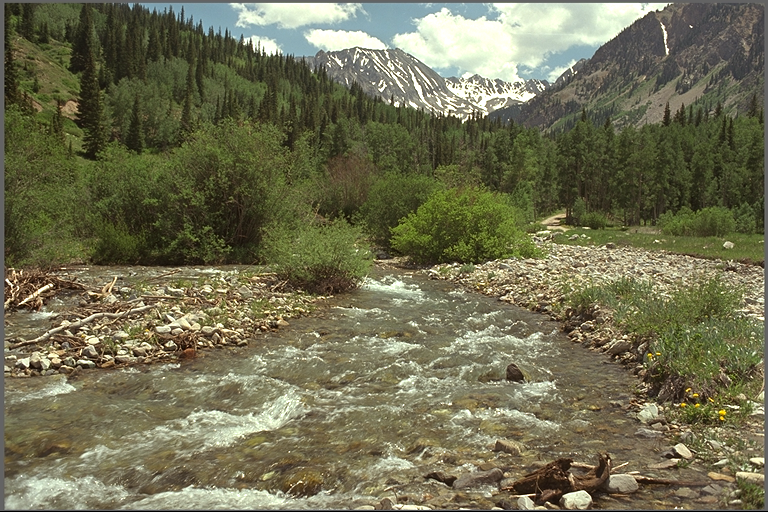

In [153]:
uncompressed_image

### Obraz po kompresji dla k=150 wartości osobliwych

Obraz dla k=150 największych wartości osobliwych macierzy
Współczynnik kompresji: 48.87% 	

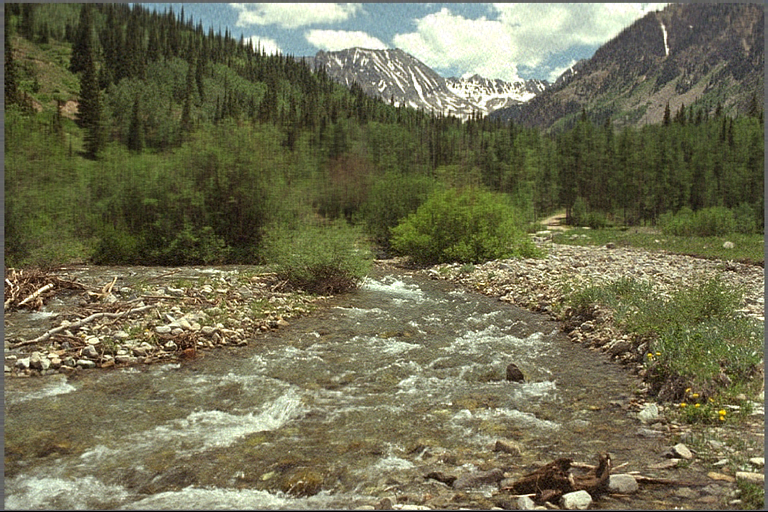

In [154]:
k = 150

println("Obraz dla k=", k, " największych wartości osobliwych macierzy")
@printf("Współczynnik kompresji: %.2f%% \t", 100*(k*org_height+k*org_width+k)/(org_height*org_width))
compress_and_print(color_channels, k)

### Obraz dla k=15

Obraz dla k=15 największych wartości osobliwych macierzy
Współczynnik kompresji: 4.89% 	

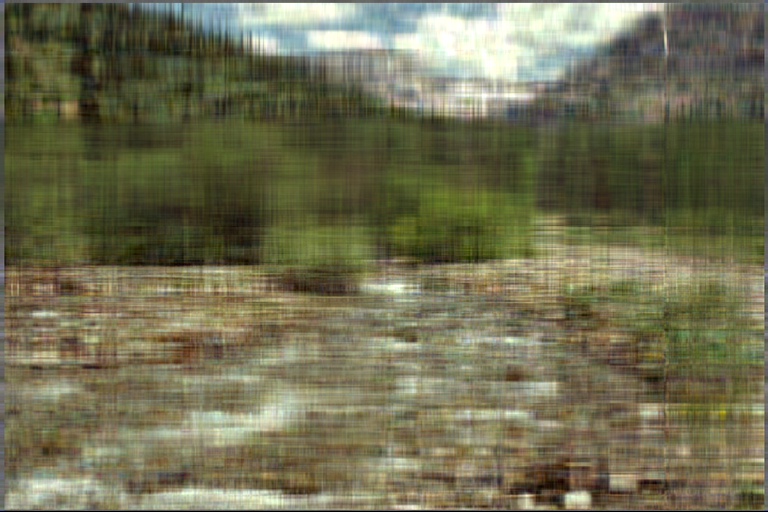

In [155]:
k = 15

println("Obraz dla k=", k, " największych wartości osobliwych macierzy")
@printf("Współczynnik kompresji: %.2f%% \t", 100*(k*org_height+k*org_width+k)/(org_height*org_width))
compress_and_print(color_channels, k)

### Obraz dla k=50:

Obraz dla k=50 największych wartości osobliwych macierzy
Współczynnik kompresji: 16.29% 	

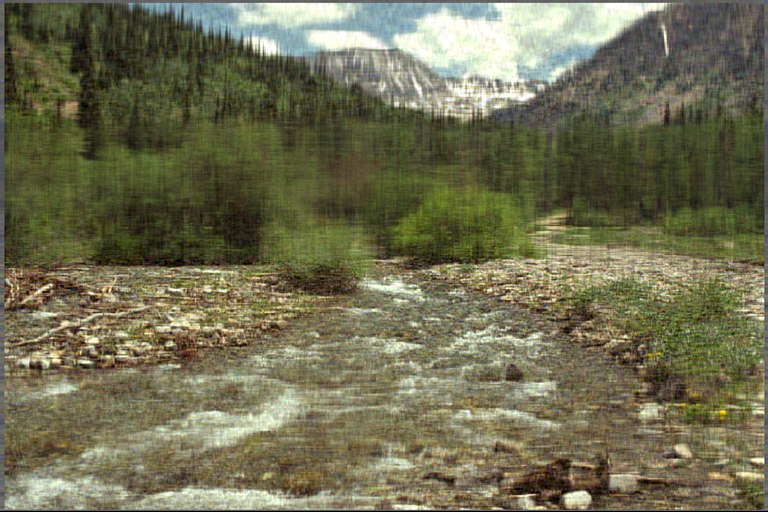

In [156]:
k = 50

println("Obraz dla k=", k, " największych wartości osobliwych macierzy")
@printf("Współczynnik kompresji: %.2f%% \t", 100*(k*org_height+k*org_width+k)/(org_height*org_width))
compress_and_print(color_channels, k)

### Obraaz dla k=200:

Obraz dla k=200 największych wartości osobliwych macierzy
Współczynnik kompresji: 65.16% 	

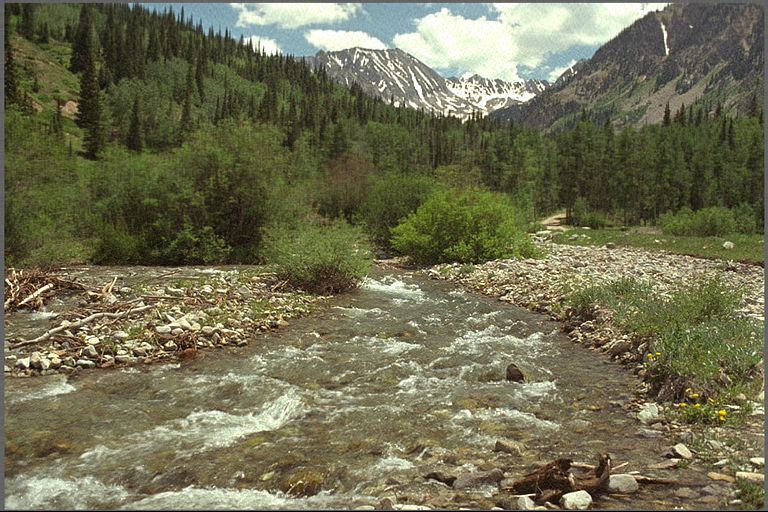

In [157]:
k = 200

println("Obraz dla k=", k, " największych wartości osobliwych macierzy")
@printf("Współczynnik kompresji: %.2f%% \t", 100*(k*org_height+k*org_width+k)/(org_height*org_width))
compress_and_print(color_channels, k)

### Komentarz: 
Już dla k=150 przy kompresji do ~50% oryginalnego rozmiaru, obraz jest dobrej jakości, choć wyraźnie widać na nim występujące szumy i zniekształcenia. Przy k=200 i kompresji do 65% rozmiaru, efekt końcowy jest już zadowalający